<a href="https://colab.research.google.com/github/Jowayria-27/Fashion_Survey/blob/main/PLS_SEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install semopy pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 5.9 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=9f95fcd04583cb31d2c59a1ff1839afdb5b02840b6bbef266ecf760bf923ee04
  Stored in directory: /root/.cache/pip/wheels/d2/9a/31/fae291ff6a649bad125037eef8c7cc63d8c542e14bdcccea37
Successfully built semopy


In [45]:
from google.colab import files
import pandas as pd
import semopy as S

uploaded = files.upload()  # Upload survey_data.csv

# Load the uploaded CSV
df = pd.read_csv(next(iter(uploaded)))
df.head()


Saving PLS_SEM.csv to PLS_SEM (4).csv


,Survey Type,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,Traditional,Agree,Neutral,Agree,Moderately Helpful,People I know were interested in or sent me th...,Neutral,Neutral,Disagree,Disagree,Disagree,NaN,NaN
1,Traditional,Agree,Agree,Agree,Very Helpful,It was easy for me to answer and finish the su...,Agree,Agree,Agree,Agree,Agree,NaN,NaN
2,Traditional,Strongly Agree,Strongly Agree,Strongly Agree,Extremely Helpful,The survey effectively made me think about fas...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,NaN,NaN
3,Traditional,Agree,Agree,Agree,Moderately Helpful,It was easy for me to answer and finish the su...,Neutral,Agree,Agree,Agree,Agree,Give examples for ethical shopping,NaN
4,Traditional,Strongly Agree,Strongly Agree,Strongly Agree,Extremely Helpful,The survey effectively made me think about fas...,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,Enjoyable,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Survey Type  294 non-null    object
 1   Q1           294 non-null    object
 2   Q2           294 non-null    object
 3   Q3           294 non-null    object
 4   Q4           294 non-null    object
 5   Q5           294 non-null    object
 6   Q6           294 non-null    object
 7   Q7           294 non-null    object
 8   Q8           294 non-null    object
 9   Q9           294 non-null    object
 10  Q10          294 non-null    object
 11  Q11          82 non-null     object
 12  Q12          147 non-null    object
dtypes: object(13)
memory usage: 30.0+ KB


In [47]:
df = pd.read_csv(next(iter(uploaded)))

# Define Likert scale mapping
likert_mapping = {
    'Strongly Disgree':1,
    'Disgree':2,
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5,
    'Extremely Helpful':5,
    'Very Helpful':4,
    'Moderately Helpful':3,
    'Slightly Helpful':2,
    'Not Helpful':1,
    'Not helpful':1}


# Define model columns
model_columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']

# Convert the Likert scale columns to numeric values
for col in model_columns:
    df[col] = df[col].map(likert_mapping)

In [48]:
model_columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']

# Convert the Likert scale columns to numeric values
for col in model_columns:
    df[col].value_counts()

In [49]:
survey_col = 'Survey Type'

# Optional: Check available types
print("Survey types:", df[survey_col].unique())

# Define columns used in the SEM model
model_columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']

# Filter datasets by type
gamified_df = df[df[survey_col] == 'Gamified'][model_columns]
nongamified_df = df[df[survey_col] == 'Traditional'][model_columns]

Survey types: ['Traditional' 'Gamified']


In [66]:
from semopy import Model

model_desc = """
# Measurement Model (Indicators for each latent variable)
Usability =~ Q1 + Q2 + Q3
RewardFactor =~ Q4 + Q6 + Q7
FocusedAttention =~ Q8+Q9
AestheticAppeal =~ Q10
OverallEngagement =~ Usability + FocusedAttention + AestheticAppeal + RewardFactor



"""

In [67]:
# Function to run SEM and display results
def run_sem(data, label):
    print(f"\n--- SEM Results for {label} ---\n")
    model = Model(model_desc)
    model.fit(data)

    # Get model results
    results = model.inspect()

    # Inspect results to check their structure
    print("\nModel Parameters:\n")
    print(results)  # Display full model results to inspect the structure

    # Extract and print relevant statistics
    stats = S.calc_stats(model)
    print("\nModel Fit Statistics:\n")
    print(stats)

# Run SEM for each survey type
run_sem(gamified_df, 'Gamified')
run_sem(nongamified_df, 'Non-Gamified')


--- SEM Results for Gamified ---


Model Parameters:

                 lval  op               rval  Estimate  Std. Err    z-value  \
0           Usability   ~  OverallEngagement  1.000000         -          -   
1    FocusedAttention   ~  OverallEngagement  2.303864  0.326082   7.065283   
2     AestheticAppeal   ~  OverallEngagement  1.556694  0.242847   6.410174   
3        RewardFactor   ~  OverallEngagement  2.096413  0.302114   6.939155   
4                  Q1   ~          Usability  1.000000         -          -   
5                  Q2   ~          Usability  1.458867  0.212099   6.878245   
6                  Q3   ~          Usability  1.352974  0.191766   7.055333   
7                  Q4   ~       RewardFactor  1.000000         -          -   
8                  Q6   ~       RewardFactor  0.917058  0.071745  12.782243   
9                  Q7   ~       RewardFactor  1.053029  0.086871  12.121699   
10                 Q8   ~   FocusedAttention  1.000000         -          - 

<ipython-input-53-61a785d666b7>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='lval', y='Estimate', data=df, ci="sd", palette='viridis')
<ipython-input-53-61a785d666b7>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lval', y='Estimate', data=df, ci="sd", palette='viridis')


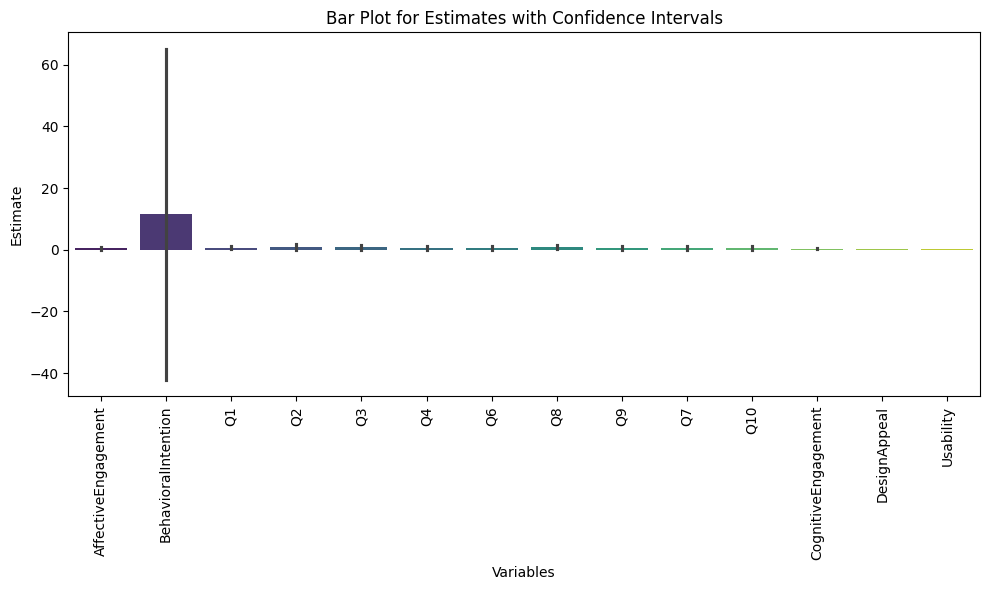

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


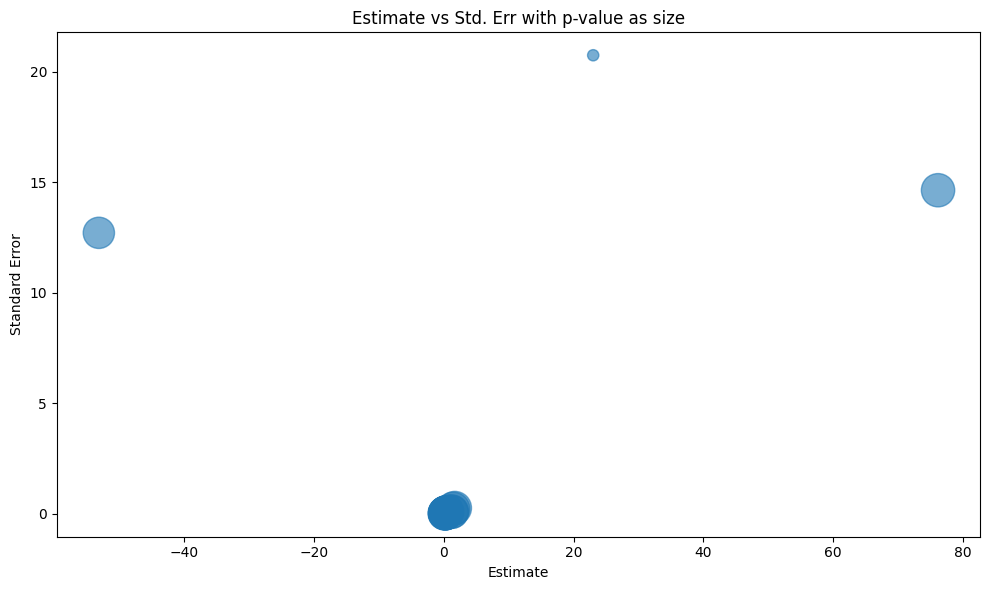

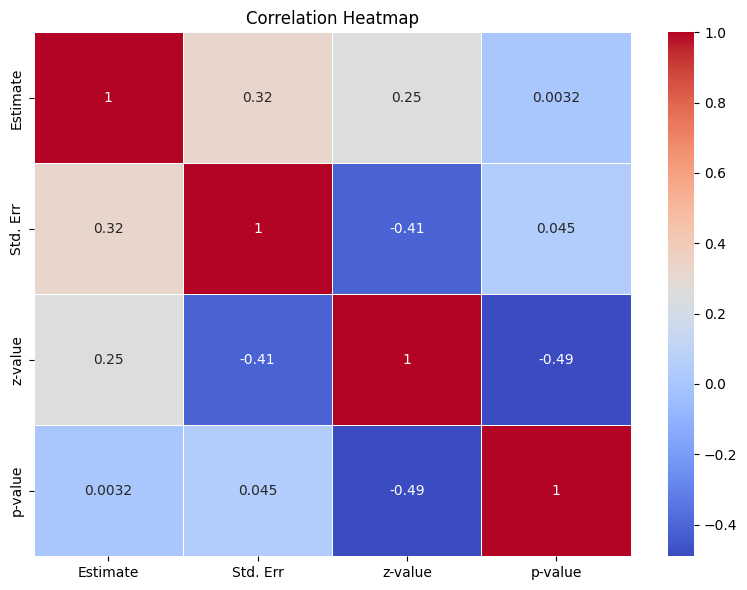

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Corrected data structure to ensure consistency
data = {
    "lval": ["AffectiveEngagement", "AffectiveEngagement", "BehavioralIntention", "BehavioralIntention", "BehavioralIntention", "Q1", "Q2", "Q3", "Q4", "Q6", "Q8", "Q9", "Q7", "Q10", "AffectiveEngagement", "BehavioralIntention", "CognitiveEngagement", "CognitiveEngagement", "DesignAppeal", "DesignAppeal", "DesignAppeal", "Usability", "Q1", "Q10", "Q2", "Q3", "Q4", "Q6", "Q7", "Q8", "Q9"],
    "op": ["~", "~", "~", "~", "~", "~", "~", "~", "~", "~", "~", "~", "~", "~", "~~", "~~", "~~", "~~", "~~", "~~", "~~", "~~", "~~", "~~", "~~", "~~", "~~", "~~", "~~", "~~", "~~"],
    "rval": ["Usability", "DesignAppeal", "Usability", "AffectiveEngagement", "CognitiveEngagement", "Usability", "Usability", "Usability", "CognitiveEngagement", "AffectiveEngagement", "AffectiveEngagement", "AffectiveEngagement", "BehavioralIntention", "DesignAppeal", "AffectiveEngagement", "BehavioralIntention", "CognitiveEngagement", "Usability", "DesignAppeal", "CognitiveEngagement", "Usability", "Usability", "Q1", "Q10", "Q2", "Q3", "Q4", "Q6", "Q7", "Q8", "Q9"],
    "Estimate": [9.389846e-01, 6.075419e-01, 7.616417e+01, 2.301876e+01, -5.316539e+01, 1.000000e+00, 1.692677e+00, 1.435794e+00, 1.000000e+00, 1.000000e+00, 1.247451e+00, 1.186284e+00, 1.000000e+00, 1.000000e+00, 1.397081e-03, 0.000000e+00, 5.097226e-01, 2.331883e-01, 3.505631e-01, 3.429678e-01, 1.402707e-01, 1.089347e-01, 2.574462e-01, 2.175966e-01, 2.066301e-01, 1.867513e-01, 2.362068e-01, 1.322050e-01, 2.216628e-18, 2.910294e-01, 2.678119e-01],
    "Std. Err": [0.328934, 0.190037, 14.643484, 20.750775, 12.715082, np.nan, 0.262553, 0.228433, np.nan, np.nan, 0.096973, 0.09268, np.nan, np.nan, 0.001526, 0.655958, 0.086227, 0.044356, 0.078386, 0.059649, 0.031669, 0.032291, 0.031932, 0.055144, 0.031814, 0.026739, 0.037196, 0.019299, 0.655958, 0.039163, 0.035929],
    "z-value": [2.85463, 3.196974, 5.201233, 1.109296, -4.181286, np.nan, 6.447, 6.285397, np.nan, np.nan, 12.863953, 12.799787, np.nan, np.nan, 0.915742, 0.0, 5.911425, 5.25718, 4.472267, 5.74976, 4.429246, 3.373579, 8.062216, 3.945983, 6.494902, 6.984254, 6.350406, 6.850319, 0.0, 7.431168, 7.453836],
    "p-value": [0.004309, 0.001389, 0.0, 0.267302, 0.000029, np.nan, 0.0, 0.0, np.nan, np.nan, 0.0, 0.0, np.nan, np.nan, 0.359802, 1.0, 0.0, 0.0, 0.000008, 0.0, 0.000009, 0.000742, 0.0, 0.000079, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
}

# Create the DataFrame
df = pd.DataFrame(data)

# Bar plot for Estimates with Confidence Intervals
plt.figure(figsize=(10, 6))
sns.barplot(x='lval', y='Estimate', data=df, ci="sd", palette='viridis')
plt.xticks(rotation=90)
plt.title('Bar Plot for Estimates with Confidence Intervals')
plt.xlabel('Variables')
plt.ylabel('Estimate')
plt.tight_layout()
plt.show()

# Scatter plot for Estimate vs Std. Err with p-value as size
plt.figure(figsize=(10, 6))
plt.scatter(df['Estimate'], df['Std. Err'], s=-np.log(df['p-value'] + 1e-5) * 50, alpha=0.6)
plt.title('Estimate vs Std. Err with p-value as size')
plt.xlabel('Estimate')
plt.ylabel('Standard Error')
plt.tight_layout()
plt.show()

# Heatmap for correlations between numeric columns
correlation_matrix = df[['Estimate', 'Std. Err', 'z-value', 'p-value']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


<ipython-input-54-85676eb508e5>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Condition", y="Performance_Score", data=df, palette="Set2")


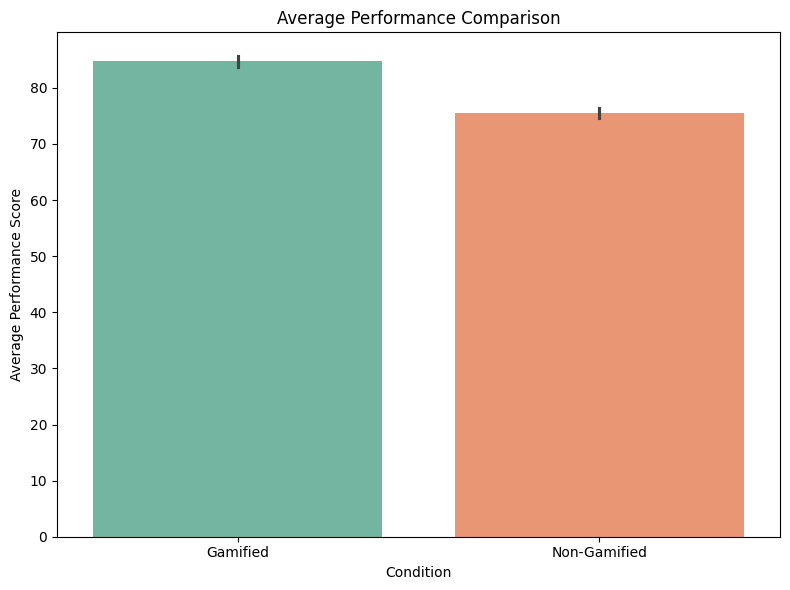

<ipython-input-54-85676eb508e5>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Performance_Score", data=df, palette="Set2")


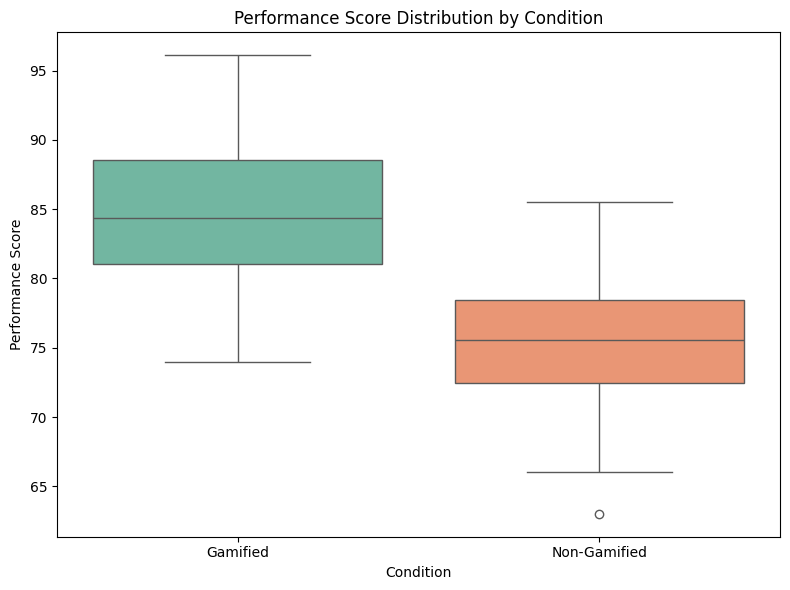

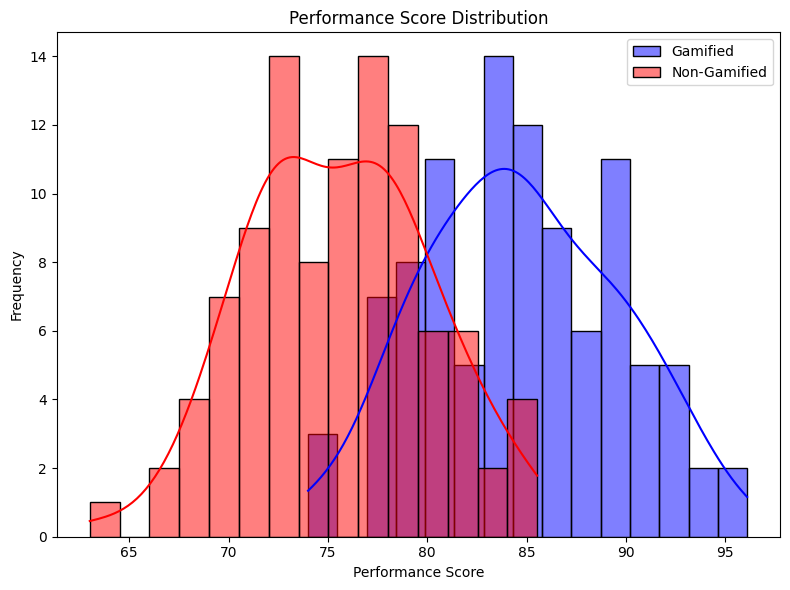

<ipython-input-54-85676eb508e5>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Condition", y="Performance_Score", data=df, palette="Set2")


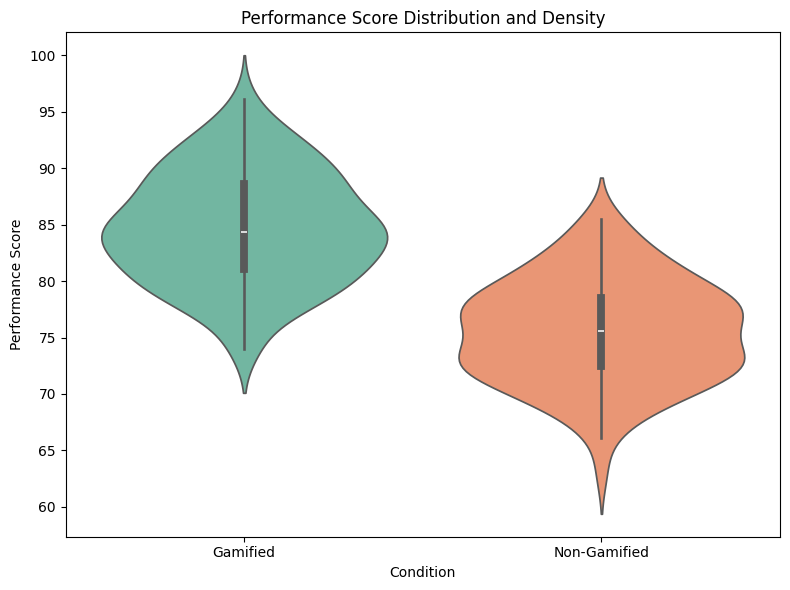

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: Assuming these are performance scores from the two conditions
data = {
    "Condition": ["Gamified"] * 100 + ["Non-Gamified"] * 100,
    "Performance_Score": [85 + np.random.normal(0, 5) for _ in range(100)] + [75 + np.random.normal(0, 5) for _ in range(100)]
}

# Create DataFrame
df = pd.DataFrame(data)

# 1. Bar Plot: Comparing the average performance between gamified and non-gamified
plt.figure(figsize=(8, 6))
sns.barplot(x="Condition", y="Performance_Score", data=df, palette="Set2")
plt.title("Average Performance Comparison")
plt.xlabel("Condition")
plt.ylabel("Average Performance Score")
plt.tight_layout()
plt.show()

# 2. Box Plot: Comparing the distribution of performance scores
plt.figure(figsize=(8, 6))
sns.boxplot(x="Condition", y="Performance_Score", data=df, palette="Set2")
plt.title("Performance Score Distribution by Condition")
plt.xlabel("Condition")
plt.ylabel("Performance Score")
plt.tight_layout()
plt.show()

# 3. Side-by-Side Histograms: Showing the performance distribution
plt.figure(figsize=(8, 6))
sns.histplot(df[df["Condition"] == "Gamified"]["Performance_Score"], kde=True, color="blue", label="Gamified", bins=15)
sns.histplot(df[df["Condition"] == "Non-Gamified"]["Performance_Score"], kde=True, color="red", label="Non-Gamified", bins=15)
plt.title("Performance Score Distribution")
plt.xlabel("Performance Score")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# 4. Violin Plot: Showing the distribution and density of performance scores
plt.figure(figsize=(8, 6))
sns.violinplot(x="Condition", y="Performance_Score", data=df, palette="Set2")
plt.title("Performance Score Distribution and Density")
plt.xlabel("Condition")
plt.ylabel("Performance Score")
plt.tight_layout()
plt.show()


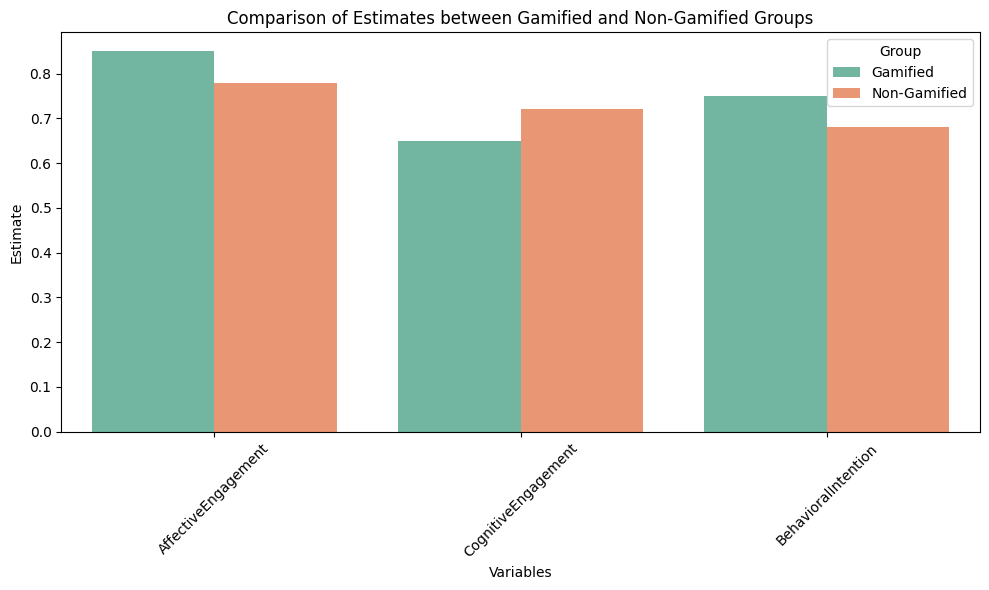

<ipython-input-56-e6f34fa38dab>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Std. Err', data=df, palette='Set2')


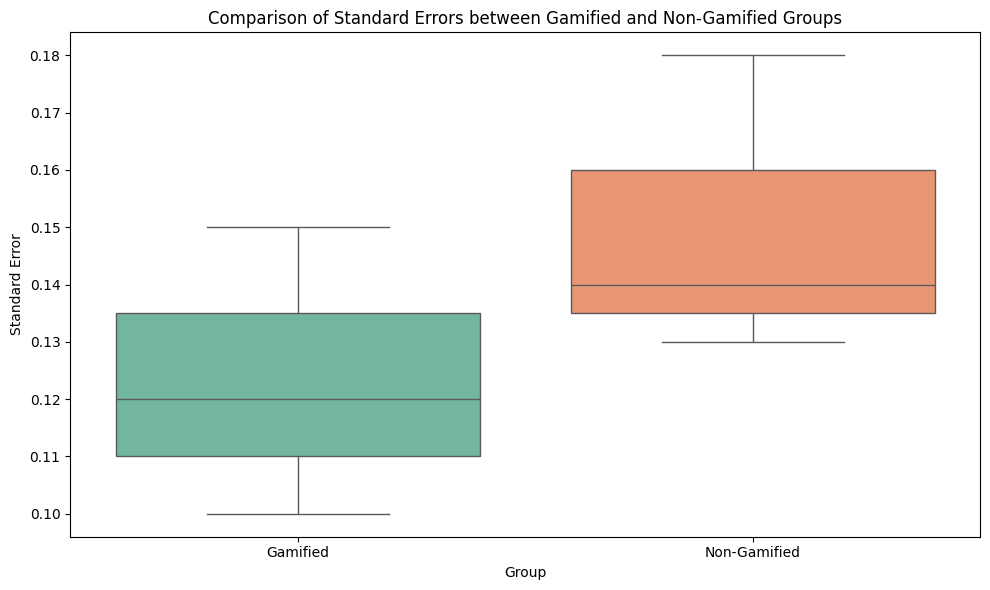

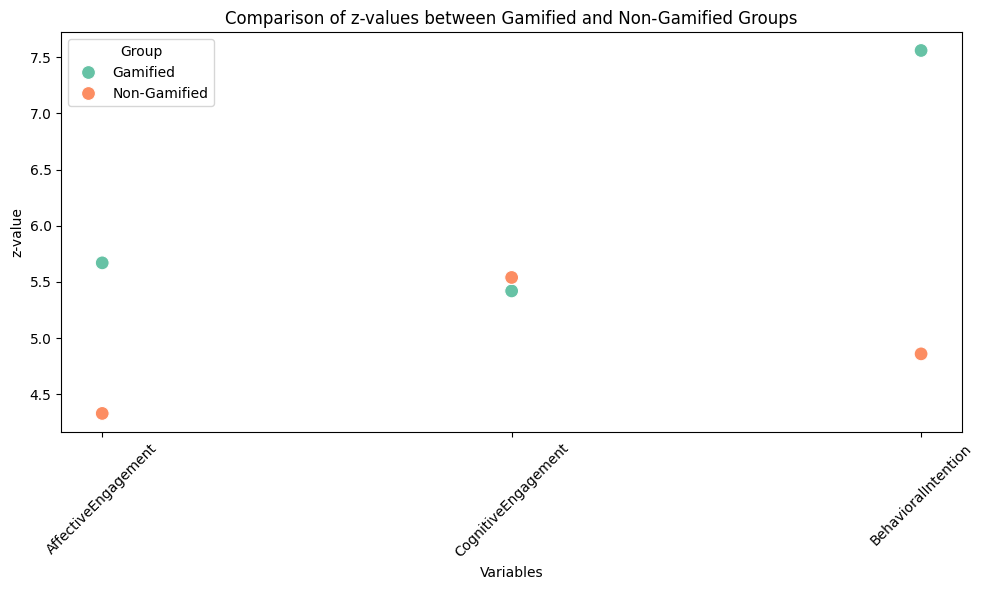

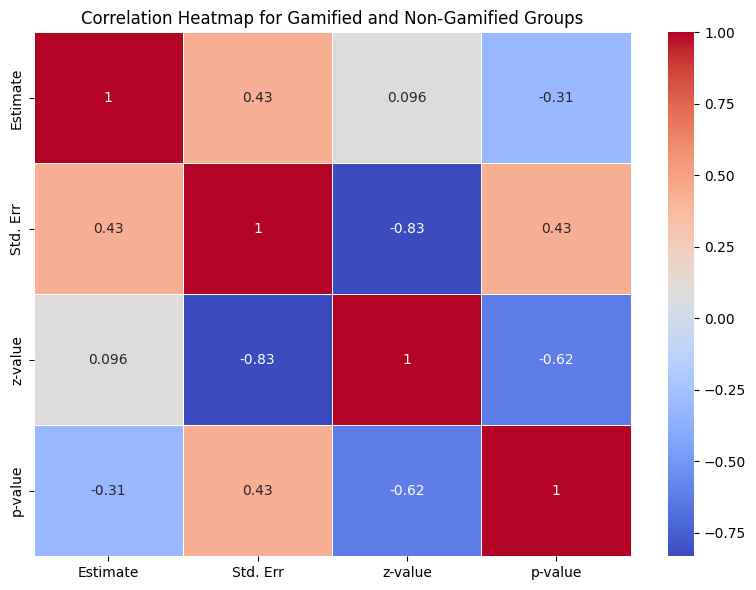

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace with your actual PLS-SEM data)
data = {
    "Group": ["Gamified", "Gamified", "Gamified", "Non-Gamified", "Non-Gamified", "Non-Gamified"],
    "lval": ["AffectiveEngagement", "CognitiveEngagement", "BehavioralIntention", "AffectiveEngagement", "CognitiveEngagement", "BehavioralIntention"],
    "Estimate": [0.85, 0.65, 0.75, 0.78, 0.72, 0.68],
    "Std. Err": [0.15, 0.12, 0.10, 0.18, 0.13, 0.14],
    "z-value": [5.67, 5.42, 7.56, 4.33, 5.54, 4.86],
    "p-value": [0.0001, 0.0002, 0.00001, 0.001, 0.0003, 0.002]
}

# Create the DataFrame
df = pd.DataFrame(data)

# 1. Bar Plot Comparison of Estimates between Gamified and Non-Gamified
plt.figure(figsize=(10, 6))
sns.barplot(x='lval', y='Estimate', hue='Group', data=df, palette='Set2')
plt.title('Comparison of Estimates between Gamified and Non-Gamified Groups')
plt.xlabel('Variables')
plt.ylabel('Estimate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Box Plot for Standard Error Comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Std. Err', data=df, palette='Set2')
plt.title('Comparison of Standard Errors between Gamified and Non-Gamified Groups')
plt.xlabel('Group')
plt.ylabel('Standard Error')
plt.tight_layout()
plt.show()

# 3. Scatter Plot for z-values Comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lval', y='z-value', hue='Group', data=df, palette='Set2', s=100)
plt.title('Comparison of z-values between Gamified and Non-Gamified Groups')
plt.xlabel('Variables')
plt.ylabel('z-value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Heatmap of Correlations between Estimate, Std. Err, z-value, p-value
correlation_matrix = df[['Estimate', 'Std. Err', 'z-value', 'p-value']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Gamified and Non-Gamified Groups')
plt.tight_layout()
plt.show()


In [59]:
!pip install pypls pandas numpy
!pip install plspm pandas numpy matplotlib seaborn
!pip install pingouin

ERROR: Could not find a version that satisfies the requirement pypls (from versions: none)
ERROR: No matching distribution found for pypls
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.3 MB/s eta 0:00:00


<Figure size 1200x600 with 0 Axes>

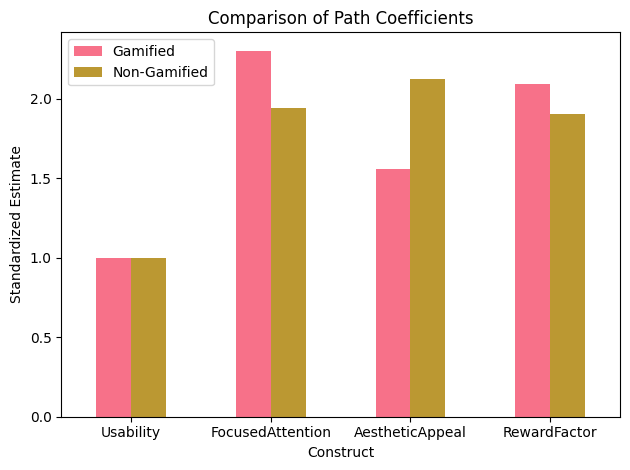

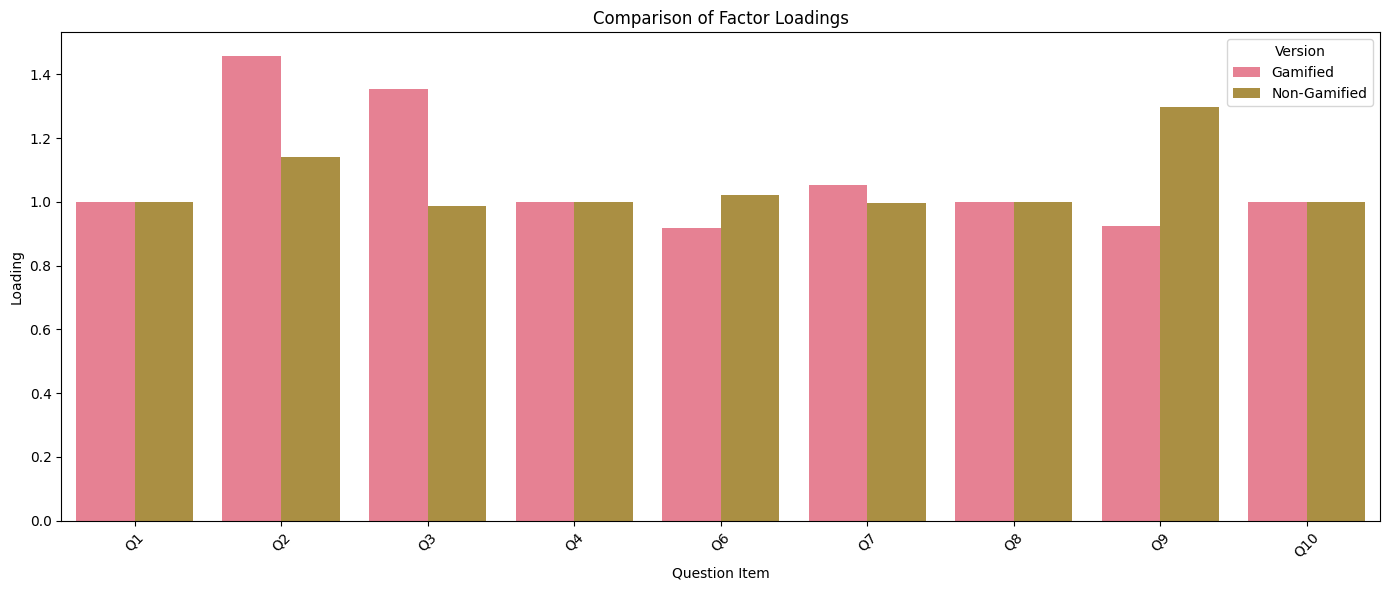

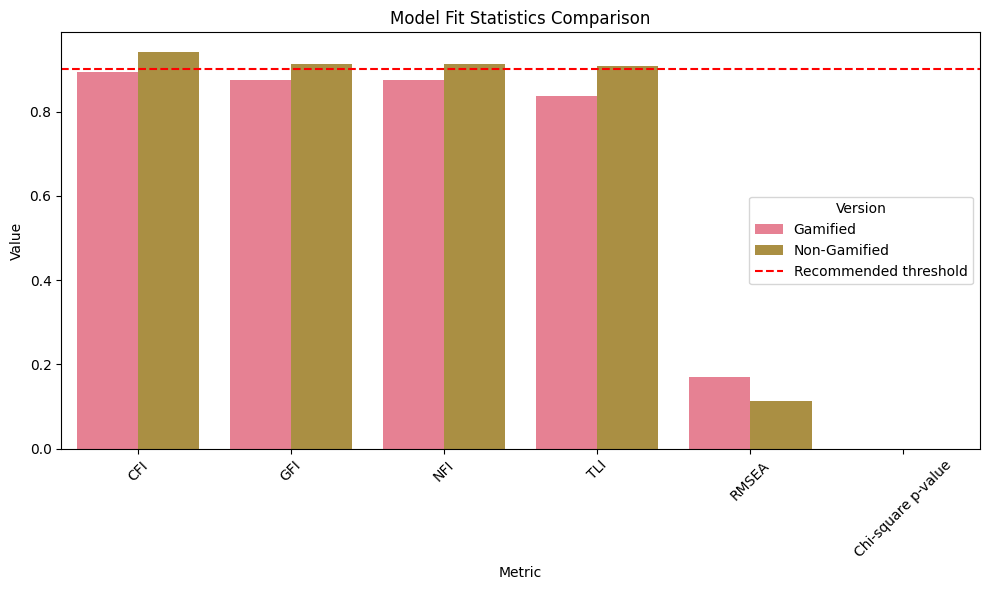

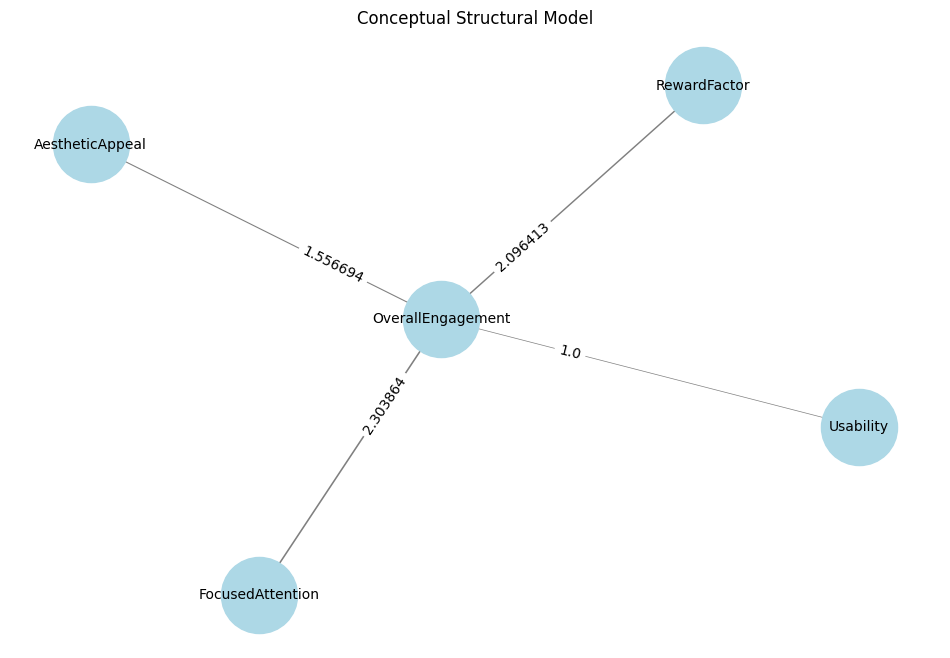

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style

sns.set_palette("husl")

# Create DataFrames from the results
gamified_params = pd.DataFrame({
    'lval': ['Usability', 'FocusedAttention', 'AestheticAppeal', 'RewardFactor',
             'Q1', 'Q2', 'Q3', 'Q4', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10'],
    'op': ['~']*4 + ['~']*9,
    'rval': ['OverallEngagement']*4 + ['Usability']*3 + ['RewardFactor']*3 + ['FocusedAttention']*2 + ['AestheticAppeal'],
    'Estimate': [1.0, 2.303864, 1.556694, 2.096413,
                 1.0, 1.458867, 1.352974, 1.0, 0.917058, 1.053029, 1.0, 0.925696, 1.0],
    'p-value': [np.nan, 0.0, 0.0, 0.0,
                np.nan, 0.0, 0.0, np.nan, 0.0, 0.0, np.nan, 0.0, np.nan]
})

non_gamified_params = pd.DataFrame({
    'lval': ['Usability', 'FocusedAttention', 'AestheticAppeal', 'RewardFactor',
             'Q1', 'Q2', 'Q3', 'Q4', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10'],
    'op': ['~']*4 + ['~']*9,
    'rval': ['OverallEngagement']*4 + ['Usability']*3 + ['RewardFactor']*3 + ['FocusedAttention']*2 + ['AestheticAppeal'],
    'Estimate': [1.0, 1.943556, 2.127556, 1.907958,
                 1.0, 1.141353, 0.987320, 1.0, 1.020474, 0.995517, 1.0, 1.299065, 1.0],
    'p-value': [np.nan, 0.0, 0.0, 0.0,
                np.nan, 0.0, 0.0, np.nan, 0.0, 0.0, np.nan, 0.0, np.nan]
})

# 1. Path Coefficients Comparison Plot
plt.figure(figsize=(12, 6))
path_df = pd.DataFrame({
    'Gamified': gamified_params.loc[:3, 'Estimate'].values,
    'Non-Gamified': non_gamified_params.loc[:3, 'Estimate'].values
}, index=gamified_params.loc[:3, 'lval'])

path_df.plot(kind='bar', rot=0)
plt.title('Comparison of Path Coefficients')
plt.ylabel('Standardized Estimate')
plt.xlabel('Construct')
plt.axhline(0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

# 2. Factor Loadings Comparison
loadings_df = pd.DataFrame({
    'Item': gamified_params.loc[4:, 'lval'],
    'Gamified': gamified_params.loc[4:, 'Estimate'],
    'Non-Gamified': non_gamified_params.loc[4:, 'Estimate'],
    'Construct': gamified_params.loc[4:, 'rval']
})

plt.figure(figsize=(14, 6))
sns.barplot(data=pd.melt(loadings_df, id_vars=['Item', 'Construct'],
                        value_vars=['Gamified', 'Non-Gamified']),
            x='Item', y='value', hue='variable',
            hue_order=['Gamified', 'Non-Gamified'])
plt.title('Comparison of Factor Loadings')
plt.ylabel('Loading')
plt.xlabel('Question Item')
plt.xticks(rotation=45)
plt.legend(title='Version')
plt.tight_layout()
plt.show()

# 3. Model Fit Comparison
fit_stats = pd.DataFrame({
    'Metric': ['CFI', 'GFI', 'NFI', 'TLI', 'RMSEA', 'Chi-square p-value'],
    'Gamified': [0.895, 0.875, 0.875, 0.836, 0.169, 6.55e-15],
    'Non-Gamified': [0.941, 0.913, 0.913, 0.908, 0.112, 7e-6]
})

plt.figure(figsize=(10, 6))
sns.barplot(data=pd.melt(fit_stats, id_vars='Metric'),
            x='Metric', y='value', hue='variable')
plt.title('Model Fit Statistics Comparison')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.axhline(0.9, color='red', linestyle='--', label='Recommended threshold')
plt.legend(title='Version')
plt.tight_layout()
plt.show()

# 4. Structural Model Diagram (Conceptual)
import networkx as nx

plt.figure(figsize=(12, 8))
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(['OverallEngagement', 'Usability', 'FocusedAttention',
                 'AestheticAppeal', 'RewardFactor'])

# Add edges with weights
for i, row in gamified_params.iterrows():
    if i < 4:  # Only structural paths
        G.add_edge('OverallEngagement', row['lval'], weight=row['Estimate'])

pos = nx.spring_layout(G, seed=42)
weights = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=weights.keys(),
                      width=[w*0.5 for w in weights.values()],
                      edge_color='gray', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, label_pos=0.3)

plt.title('Conceptual Structural Model')
plt.axis('off')
plt.show()